In [1]:
import pandas as pd
import numpy as np


def process_data(filename, time_step, init_time_value, fin_time_value, init_temp_value, fin_temp_value, temp_step, column_names):
    
    data = {}  # This is a dictionary to contain data for each temperature


    number_of_rows = int(((fin_time_value - init_time_value)/time_step) + 1) 


    number_of_temperatures = int(((fin_temp_value - init_temp_value)/temp_step) + 1)


    
    for k in range(init_temp_value, fin_temp_value + temp_step, temp_step):

        # this code says, for example, if this is tempertare number 2, skip 2 X number_of_rows and the read only number_of_rows
        index_of_temperature = int(((k - init_temp_value)/temp_step) + 1)
        header_rows_to_skip = (index_of_temperature - 1) * (number_of_rows)

        data["{}".format(k)] = pd.read_csv("{}.txt".format(filename), header=None,
                                           delimiter="\t", 
                                           names=column_names, index_col=False,
                                           skiprows=header_rows_to_skip,  nrows=number_of_rows)
    return data
        
    

In [2]:
column_names = ["Time Step", "Energy", "LM X", "LM Y", "LM Z", "LM ",
                 "Polarization", "Electric Field"]

init_temp_value = 300
fin_temp_value = 510
temp_step = 10

init_time_value = 51
fin_time_value = 599851
time_step = 100

filename = "my_new_mc_10"

data = process_data(filename, time_step, init_time_value, fin_time_value, init_temp_value, fin_temp_value, temp_step, column_names)

In [8]:
# data = {key: pd.concat([data[key].loc[0:100,:], 
#                        data[key].loc[300:350,:]])
#                        for key in data.keys()}

In [3]:
data['510']

,Time Step,Energy,LM X,LM Y,LM Z,LM,Polarization,Electric Field
0,51,0.003245,0.000185,0.000092,0.000833,0.026298,0.241692,-5.340706
1,151,0.003724,0.000164,-0.000373,0.000768,0.032137,0.215166,-15.812657
2,251,0.003711,-0.000390,0.000485,0.001190,0.032322,-0.509688,-26.284537
3,351,0.003710,-0.000602,0.000755,0.001679,0.032429,-0.786775,-36.756303
4,451,0.003674,-0.000772,0.001035,0.001617,0.032714,-1.009698,-47.227907
...,...,...,...,...,...,...,...,...
5994,599451,0.003567,0.010111,0.001566,0.000243,0.032919,13.224717,57.489879
5995,599551,0.003552,0.008967,0.002221,-0.000007,0.032835,11.728247,47.018477
5996,599651,0.003543,0.008661,0.002952,-0.000441,0.032886,11.329033,36.546869
5997,599751,0.003524,0.008080,0.003009,-0.000711,0.032859,10.567999,26.075101


In [4]:
for k in range(300, 520, 10):      
    data["{}".format(k)].to_csv("LocalModeData_For_{}k.csv".format(k), header=False, index=False)

In [5]:
import matplotlib.pyplot as plt

def plot_data(quantities, data, save_file_name, temperature, plot_title, figure_size):
    
    fig, ax = plt.subplots(nrows=1, ncols=len(quantities), figsize=figure_size)
    
    font = {'family': 'serif','color': 'darkred','weight': 'normal','size': 16}
    
    if len(quantities) > 1:
        
        for i in range(len(quantities)):

            for value in quantities[i]["Y Values"]:

                ax[i].plot(data["{}".format(temperature)][quantities[i]["X Values"]], data["{}".format(temperature)][value],
                        linewidth=2, markersize=10, label=value)
                ax[i].spines["right"].set_visible(False)
                ax[i].spines["top"].set_visible(False)
                ax[i].xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
                ax[i].yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
                ax[i].legend(loc=quantities[i]["Legend Location"], frameon=True, fontsize=16)
                ax[i].set_ylabel(quantities[i]["Y label"], fontdict=font, labelpad=5)
                ax[i].set_xlabel(quantities[i]["X label"], fontdict=font, labelpad=10)   
 
        
        font["Size"] = 20
        plt.suptitle('{} {}k'.format(plot_title, temperature), fontdict=font)
        plt.savefig("{}_{}k.png".format(save_file_name, temperature), dpi=300,
                                transparent=False, bbox_inches='tight')
        plt.pause(5)
        plt.show(block=False)    
        
    else:

        for value in quantities[0]["Y Values"]:

            ax.plot(data["{}".format(temperature)][quantities[0]["X Values"]], data["{}".format(temperature)][value],
                    linewidth=2, markersize=10, label=value)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
        ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
        ax.legend(loc="upper left", frameon=True, fontsize=16)
        ax.set_title('{} {}k'.format(plot_title, temperature), fontdict=font, pad=10)
        ax.set_ylabel(quantities[0]["X label"], fontdict=font, labelpad=10)
        ax.set_xlabel(quantities[0]["Y label"], labelpad=10)
        plt.savefig("{}_{}k.png".format(save_file_name, temperature), dpi=300,
                                transparent=False, bbox_inches='tight')
        plt.pause(5)
        plt.show(block=False)

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def plot_hysteresis(quantities, data, save_file_name, init_temp_value, fin_temp_value,
              temp_step, figure_size, plot_title):
    
    fig, ax = plt.subplots(nrows=1, ncols=len(quantities), figsize=figure_size)
    
    #c = np.arange(1, int(((fin_temp_value - init_temp_value)/temp_step) + 1) + 1)
    c=np.arange(300,520,10)
    #c = np.array([str(item) + "k" for item in c])
    print(type(c))
    norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
    cmap.set_array([])
#     c = list(c)
#     c = [item for item in c]
#     c = np.array(c)
#     print(type(c))
    
    font = {'family': 'serif','color': 'darkred','weight': 'normal','size': 16}
    
        
    for value in quantities[0]["Y Values"]:
        for temp in range(init_temp_value, fin_temp_value+temp_step, temp_step):
            index_of_temperature = int(((k - init_temp_value)/temp_step) + 1)
            p = ax.plot(data["{}".format(temp)][quantities[0]["X Values"]],
                    data["{}".format(temp)][value],
                    linewidth=2, markersize=10, c=cmap.to_rgba(temp))
            
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='out', bottom=True)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out', left=True)
    ax.legend([value], loc="upper left", frameon=True, fontsize=16)
    ax.set_ylabel(quantities[0]["Y label"], fontdict=font, labelpad=10)
    ax.set_xlabel(quantities[0]["X label"], labelpad=10)
    ax.set_xlim(-1000, 1000) 
    #ax.grid(b=True, which='major', axis='both')
    ax.axhline(y=0, alpha=0.2)
    ax.axvline(x=0, alpha=0.2)
    plt.savefig("{}.png".format(save_file_name), dpi=300,
                                transparent=False, bbox_inches='tight')
    fig.colorbar(cmap, ticks=c)
    plt.pause(5)
    plt.show(block=False)    
        

<class 'numpy.ndarray'>


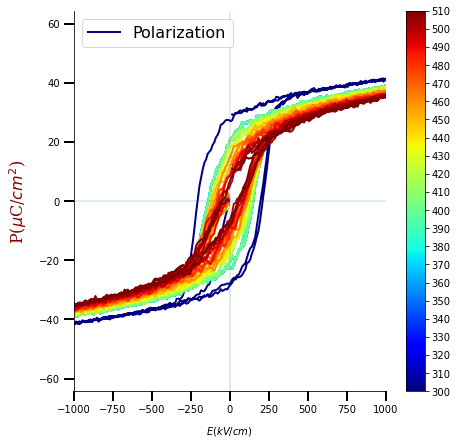

In [11]:
%matplotlib inline
quantities_1 = {"X Values": "Electric Field", 
                  "Y Values" : ["Polarization"], 
               "X label": "$E(kV/cm)$",
               "Y label": "P($\mu$C/$cm^2$)"}
               #"Legend Location": "upper left"#}

quantities = [quantities_1]


# filename you want to save figure as. Example should be something like Local_Modes_vs_Electric_Field_
save_file_name = "MC_temp_0" 

# Specify the title of your plot here for example "Local Modes against Electric Field for temperature"

plot_title = "Polarization Modes against Electric Field for" 

figure_size = (7, 7)

plot_hysteresis(quantities, data, save_file_name, init_temp_value, fin_temp_value,
              temp_step, figure_size, plot_title)

In [2]:
import numpy as np
np.sqrt(4096)

64.0